In [9]:
import numpy as np
import json
from pprint import pprint
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
import time
from load_new import getData 
%matplotlib inline

In [2]:
print trX.shape
print teX.shape

NameError: name 'trX' is not defined

In [ ]:
__author__ = 'alexandrerame'

import numpy as np
import json
from pprint import pprint
import math
import matplotlib.pyplot as plt

def getData(prop=1./3,oh=1):

    trX=[[]]
    trY=[]

    for y in range(4):
        file=getFile(y)
        with open(file) as data_file:
            data = json.load(data_file)

        size=len(data)
        print(size)

        for i in range(size):
            datX=np.array(data[i]['gravityBurst'])
            sizeDat=len(datX)

            accX=datX.flatten()[0:sizeDat:4][0:31]
            accY=datX.flatten()[1:sizeDat:4][0:31]
            accZ=datX.flatten()[2:sizeDat:4][0:31]
            T=datX[3:sizeDat:4].flatten()[0:31]
            fftX=accX#np.fft.fft(accX)
            fftY=accY#np.fft.fft(accY)
            fftZ=accZ#np.fft.fft(accZ)

            #plotprint(fftY,y)


            features=np.concatenate((fftX,fftY,fftZ),axis=1)

            if len(features)>=93:
                trX=np.append(trX,features[0:93])
                trY=np.append(trY,y)
            #else:
                #print(len(features))


    trX=np.reshape(trX,(-1,93))
    l=len(trX)
    cut=l*prop
    
    arrayRandom=np.random.permutation(l)

    trX=trX[arrayRandom,:]
    trY=trY[arrayRandom]
    if oh:
        trY = one_hot(trY, 4)
    teX=trX[:cut,:]
    teY=trY[:cut]
    trX=trX[cut:,:]
    trY=trY[cut:]
    
    return trX,trY,teX,teY

def getFile(y):
    if y==0:
        return "STILL.json"
    elif y==1:
        return "WALKING.json"
    elif y==2:
        return "RUNNING.json"
    else:
        return "BIKING.json"

def one_hot(x,n):
    if type(x) == list:
        x = np.array(x)
    x = x.flatten().astype(int)
    o_h = np.zeros((len(x),n))
    o_h[np.arange(len(x)),x] = 1
    return o_h

def plotprint(vec,y):
    if y==0:
        plt.plot(vec,color='r')
    if y==1:
        plt.plot(vec,color='b')
    if y==2:
        plt.plot(vec,color='g')
    if y==3:
        plt.plot(vec,color='m')



In [7]:
__author__ = 'alexandrerame'

import numpy as np
import json
from pprint import pprint
import math
import matplotlib.pyplot as plt

def getData_new(pca=True, with_sfft=True, win_s=5, step=3, prop=1./3, oh=1):

    trX=[[]]
    trY=[]

    for y in range(4):
        file=getFile(y)
        with open(file) as data_file:
            data = json.load(data_file)

        size=len(data)
        print(size)

        for i in range(size):
            datX=np.array(data[i]['gravityBurst'])
            sizeDat=len(datX)

            accX=datX.flatten()[0:sizeDat:4][0:31].reshape((-1,1))
            accY=datX.flatten()[1:sizeDat:4][0:31].reshape((-1,1))
            accZ=datX.flatten()[2:sizeDat:4][0:31].reshape((-1,1))
            T=datX[3:sizeDat:4].flatten()[0:31]
            
            if len(accX)!=31 or len(accY)!=31 or len(accZ)!=31:
                continue
            # fourrier fenetre
            fft=np.array( [sfft(accX, win_s, step), sfft(accY, win_s, step), sfft(accZ, win_s, step)] ).reshape((1,-1))
            
            # main directions
            pca=PCA()
            #print accX.shape
            #print accY.shape
            #print accZ.shape
            
            temp=np.concatenate((accX, accY, accZ), axis=1)
            m=np.mean(temp, axis=0).reshape((1,-1))
            temp=temp-m
            temp=pca.fit_transform(temp)
            var=np.var(temp, axis=0).reshape((1,-1))
            for j in xrange(3):
                temp[:,j]=np.fft.fft(temp[:,j])
            
            main_sfft=sfft(temp[:,0], win_s, step).reshape((1,-1))
            
            # directions + var
            directions=pca.components_.reshape((1,-1))
            

            features=np.concatenate((fft, temp.reshape((1, -1)), main_sfft, m, var, directions), axis=1)
            features=features[0,:]
            
            # je laisse a voir
            if len(features)>=93:
                trX=np.append(trX,features)
                trY=np.append(trY,y)
            #else:
                #print(len(features))


    trX=np.reshape(trX,(-1,len(features)))
    l=len(trX)
    cut=l*prop
    
    arrayRandom=np.random.permutation(l)

    trX=trX[arrayRandom,:]
    trY=trY[arrayRandom]
    if oh:
        trY = one_hot(trY, 4)
    teX=trX[:cut,:]
    teY=trY[:cut]
    trX=trX[cut:,:]
    trY=trY[cut:]
    
    return trX,trY,teX,teY



In [11]:
trX,trY,teX,teY = getData()
trYbis=np.dot(trY, range(0,4))
teYbis=np.dot(teY, range(0,4))
print trX.shape
print trY.shape

2224
3106
536
759
450
(4283, 450)
(4283, 4)


load_new.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  temp[:,j]=np.fft.fft(temp[:,j])


In [214]:
trX,trY,teX,teY = getData_new()
trYbis=np.dot(trY, range(0,4))
teYbis=np.dot(teY, range(0,4))
print trX.shape
print trY.shape

2224
3106
536
759
(4283, 288)
(4283, 4)


/home/notebook/.venv/lib/python2.7/site-packages/IPython/kernel/__main__.py:48: ComplexWarning: Casting complex values to real discards the imaginary part


In [215]:

def burst_fft(burst):
    burst_pca=np.copy(burst)
    for i in xrange(burst.shape[0]):
        temp = burst_pca[i,:].reshape((3,-1))
        temp = np.transpose(temp)
        for j in xrange(3):
            temp[:,j]=np.fft.fft(temp[:,j])
        burst_pca[i,:]=temp.reshape((1,-1))
        
        #print pca.components_.shape
    #print comp[:3,:]
    return burst_pca


def burst_sfft(burst, win_s=5, step=3):
    burst_pca=np.copy(burst)
    first=True
    res=np.array([])
    pca=PCA()
    comp=np.array([]).reshape((0,9))
    mean_vec=np.array([]).reshape((0,3))
    for i in xrange(burst.shape[0]):
        temp = burst_pca[i,:].reshape((3,-1))
        temp = np.transpose(temp)
        m=np.mean(temp, axis=0).reshape((1,-1))
        temp=temp-m
        temp[:,:3]=pca.fit_transform(temp[:,:3])
        pca.fit_transform(temp[:,:3])
        vec=np.array([])
        for j in xrange(3):
            if j==0:
                vec=np.append(vec, sfft(temp[:,j], win_s, step) )
            else:
                vec=np.append(vec, np.fft.fft(temp[:,j]) )
        vec=np.array(vec).reshape((1, -1))
        if first:
            first=False
            res=vec
        else:
            res=np.concatenate((res, vec), axis=0 )
        
        comp=np.append(comp, pca.components_.reshape((1,-1)), axis=0 )
        mean_vec=np.append(mean_vec, m, axis=0 )
        #print pca.components_.shape
    #print comp[:3,:]
    return np.concatenate((res, comp, mean_vec), axis=1)

def burst_pca(burst):
    burst_pca=np.copy(burst)
    pca=PCA()
    comp=np.array([]).reshape((0,9))
    mean_vec=np.array([]).reshape((0,3))
    for i in xrange(burst.shape[0]):
        temp = burst_pca[i,:].reshape((3,-1))
        temp = np.transpose(temp)
        m=np.mean(temp, axis=0).reshape((1,-1))
        #print m.shape
        temp=temp-m
        temp[:,:3]=pca.fit_transform(temp[:,:3])
        
        for j in xrange(3):
            temp[:,j]=np.fft.fft(temp[:,j])
        
        burst_pca[i,:]=temp.reshape((1,-1))
        
        comp=np.append(comp, pca.components_.reshape((1,-1)), axis=0 )
        mean_vec=np.append(mean_vec, m, axis=0 )
        #print pca.components_.shape
    #print comp[:3,:]
    return np.concatenate((burst_pca, comp, mean_vec), axis=1)


In [171]:
trXp=burst_pca(trX)
teXp=burst_pca(teX)

trXf=burst_fft(trX)
teXf=burst_fft(teX)

trXs=burst_sfft(trX)
teXs=burst_sfft(teX)


/home/notebook/.venv/lib/python2.7/site-packages/IPython/kernel/__main__.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/home/notebook/.venv/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: ComplexWarning: Casting complex values to real discards the imaginary part


In [172]:
print trXf.shape
print trXs.shape

(4283, 93)
(4283, 119)


In [13]:
clf=RandomForestClassifier(n_estimators=3000)
clf.fit(trX, trYbis)
p=clf.predict(teX)
1.0*np.sum(p==teYbis)/len(teYbis)

0.9243344231667445

In [ ]:
0.8916394208313873
0.9140588510042037
0.9243344231667445

In [130]:
clf=RandomForestClassifier(n_estimators=2000)
clf.fit(trXp, trYbis)
p=clf.predict(teXp)
1.0*np.sum(p==teYbis)/len(teYbis)

0.9140588510042037

In [216]:
clf=RandomForestClassifier(n_estimators=3000)
clf.fit(trX, trYbis)
p=clf.predict(teX)
1.0*np.sum(p==teYbis)/len(teYbis)

0.9252685660906118

In [ ]:
c

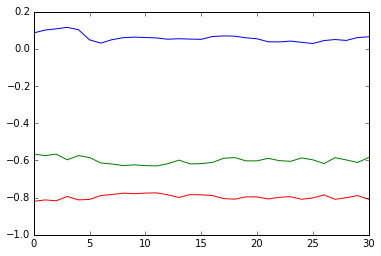

In [223]:
d=trX[349,:].reshape((3,-1))
#d=d-np.mean(d, axis=1).reshape((-1,1))

for i in xrange(3):
    plt.plot(d[i,:])

pca=PCA()



In [89]:
np.mean(d, axis=1).reshape((-1,1)).shape

(3, 1)

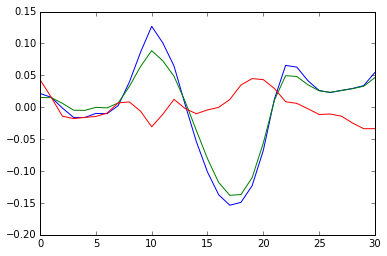

In [166]:
d=np.transpose(trX[302,:].reshape((3,-1)))
#d=d.reshape((-1,3))
d=d-np.mean(d, axis=0).reshape((1,-1))

for i in xrange(3):
    plt.plot(d[:,i])



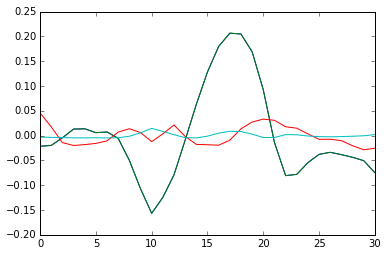

In [169]:
pca=PCA()
d=pca.fit_transform(d)
plt.plot(d[:,0])
for i in xrange(3):
    plt.plot(d[:,i])

In [45]:
np.mean(d, axis=1)

array([ 0.43599867, -0.48214358,  0.04614491])

In [49]:
trYbis=np.dot(trY, range(0,4))
teYbis=np.dot(teY, range(0,4))

(31,)

In [205]:
a=np.ones((1,2))
a.reshape((2,))
print a.shape

(1, 2)
